In [ ]:
pip install yfinance

# === Import libraries ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# === Configuration ===
tickers = ["AAPL", "TSLA"]
start_date = "2022-01-01"
end_date = "2023-12-31"

# === 1. Download historical data ===
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=True)["Close"]

# === 2. Compute daily returns ===
returns = data.pct_change().dropna()

# === 3. Compute correlation ===
corr_matrix = returns.corr()
rho = corr_matrix.loc["AAPL", "TSLA"]

print("Correlation matrix:")
print(corr_matrix)
print(f"\nCorrelation (AAPL ↔ TSLA): {rho:.4f}")

# === 4. Plot adjusted closing prices ===
plt.figure(figsize=(12,6))
for ticker in tickers:
    plt.plot(data.index, data[ticker], label=ticker)
plt.title("Adjusted Closing Prices")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.show()

# === 5. Plot scatter of returns ===
plt.figure(figsize=(6,6))
plt.scatter(returns["AAPL"], returns["TSLA"], alpha=0.5)
plt.title("Daily Returns: AAPL vs TSLA")
plt.xlabel("AAPL daily return")
plt.ylabel("TSLA daily return")
plt.grid(True)
plt.show()

# === 6. Compute portfolio stats for chosen weights ===
weights = np.array([0.5, 0.5])  # e.g., 50% AAPL, 50% TSLA

mean_returns = returns.mean() * 252  # annualize by approx 252 trading days
cov_matrix = returns.cov() * 252  # annualized covariance matrix

port_return = weights @ mean_returns
port_variance = weights @ cov_matrix @ weights
port_risk = np.sqrt(port_variance)

print(f"\nPortfolio expected annual return: {port_return*100:.2f}%")
print(f"Portfolio annual risk (std dev): {port_risk*100:.2f}%")


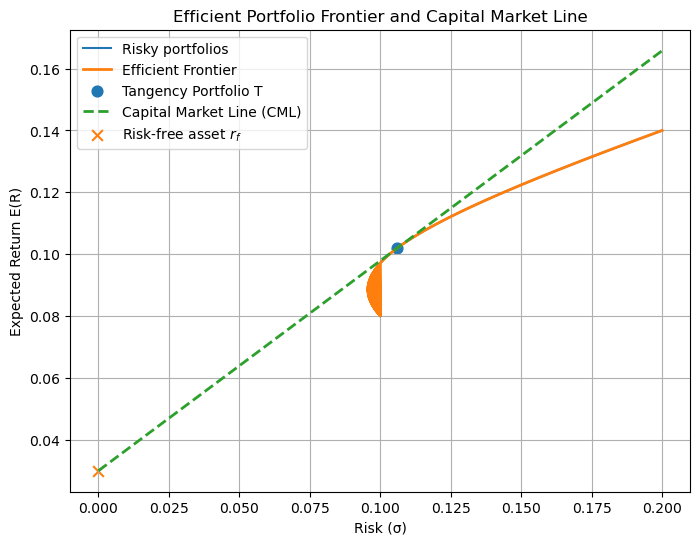

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- 1. Inputs ----------
# Two risky assets
mu1, mu2 = 0.08, 0.14        # expected returns
sigma1, sigma2 = 0.10, 0.20  # standard deviations
rho = 0.2                    # correlation between assets

# Risk-free rate
rf = 0.03

# ---------- 2. Portfolios of the two risky assets ----------
w = np.linspace(0, 1, 200)   # weight on asset 1
w1 = w
w2 = 1 - w1

# Portfolio expected return
mu_p = w1 * mu1 + w2 * mu2

# Portfolio risk (std dev)
cov12 = rho * sigma1 * sigma2
sigma_p = np.sqrt(
    (w1**2) * sigma1**2 +
    (w2**2) * sigma2**2 +
    2 * w1 * w2 * cov12
)

# Sort by risk for a cleaner curve
order = np.argsort(sigma_p)
sigma_sorted = sigma_p[order]
mu_sorted = mu_p[order]

# ---------- 3. Find tangency portfolio (max Sharpe ratio) ----------
sharpe = (mu_sorted - rf) / sigma_sorted
idx_tan = np.argmax(sharpe)
sigma_T = sigma_sorted[idx_tan]
mu_T = mu_sorted[idx_tan]

# Capital Market Line (CML)
sigma_cml = np.linspace(0, sigma_sorted.max(), 100)
mu_cml = rf + (mu_T - rf) / sigma_T * sigma_cml

# ---------- 4. Plot ----------
plt.figure(figsize=(8, 6))

# All risky portfolios (two-asset opportunity set)
plt.plot(sigma_p, mu_p, label="Risky portfolios")

# Efficient frontier (for two assets the upper part of the curve is efficient)
plt.plot(sigma_sorted, mu_sorted, linewidth=2, label="Efficient Frontier")

# Tangency portfolio T
plt.scatter([sigma_T], [mu_T], marker='o', s=60, label="Tangency Portfolio T")

# Capital Market Line
plt.plot(sigma_cml, mu_cml, linestyle='--', linewidth=2, label="Capital Market Line (CML)")

# Risk-free point
plt.scatter([0], [rf], marker='x', s=60, label="Risk-free asset $r_f$")

plt.xlabel("Risk (σ)")
plt.ylabel("Expected Return E(R)")
plt.title("Efficient Portfolio Frontier and Capital Market Line")
plt.legend()
plt.grid(True)
plt.show()
